In [137]:
import pandas as pd
import json
import os

In [138]:
files = os.listdir('data/raw/')
data = []
for f in files:
    print('reading: ' +f)
    with open('data/raw/' + f, 'r') as file:
        for stream_data in json.load(file):
            # print(stream_data)
            data += [stream_data]

reading: Streaming_History_Audio_2014-2018_0.json
reading: Streaming_History_Audio_2024_5.json
reading: Streaming_History_Audio_2019-2021_2.json
reading: Streaming_History_Audio_2018-2019_1.json
reading: Streaming_History_Video_2016-2024.json
reading: Streaming_History_Audio_2024_4.json
reading: Streaming_History_Audio_2021-2024_3.json


In [139]:
print(f'total streams: {len(df)}')

total streams: 83743


In [140]:
print(data[:10])

[{'ts': '2014-03-29T11:46:30Z', 'username': '12135342802', 'platform': 'iOS 7.1 (iPhone5,1)', 'ms_played': 20619, 'conn_country': 'CL', 'ip_addr_decrypted': '186.9.128.4', 'user_agent_decrypted': 'unknown', 'master_metadata_track_name': 'Clavo Y Martilleo', 'master_metadata_album_artist_name': 'Tiro De Gracia', 'master_metadata_album_album_name': 'Ser Hümano!!', 'spotify_track_uri': 'spotify:track:7op20AvNznqn3fTNQE1O4S', 'episode_name': None, 'episode_show_name': None, 'spotify_episode_uri': None, 'reason_start': '', 'reason_end': 'fwdbtn', 'shuffle': False, 'skipped': True, 'offline': False, 'offline_timestamp': 0, 'incognito_mode': False}, {'ts': '2014-03-29T11:50:37Z', 'username': '12135342802', 'platform': 'iOS 7.1 (iPhone5,1)', 'ms_played': 229466, 'conn_country': 'CL', 'ip_addr_decrypted': '186.9.128.4', 'user_agent_decrypted': 'unknown', 'master_metadata_track_name': 'Corsario Universal', 'master_metadata_album_artist_name': 'Tiro De Gracia', 'master_metadata_album_album_name':

In [141]:
df = pd.DataFrame(data)
df.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2014-03-29T11:46:30Z,12135342802,"iOS 7.1 (iPhone5,1)",20619,CL,186.9.128.4,unknown,Clavo Y Martilleo,Tiro De Gracia,Ser Hümano!!,...,None,None,None,,fwdbtn,False,True,False,0.0,False
1,2014-03-29T11:50:37Z,12135342802,"iOS 7.1 (iPhone5,1)",229466,CL,186.9.128.4,unknown,Corsario Universal,Tiro De Gracia,Ser Hümano!!,...,None,None,None,fwdbtn,trackdone,True,False,False,0.0,False
2,2014-03-29T11:55:43Z,12135342802,"iOS 7.1 (iPhone5,1)",191040,CL,186.9.128.4,unknown,Bebedor,Tiro De Gracia,Ser Hümano!!,...,None,None,None,trackdone,trackdone,True,False,False,0.0,False
3,2014-03-29T11:59:48Z,12135342802,"iOS 7.1 (iPhone5,1)",243933,CL,186.9.128.4,unknown,Opyo,Tiro De Gracia,Ser Hümano!!,...,None,None,None,trackdone,trackdone,True,False,False,0.0,False
4,2014-03-29T12:02:07Z,12135342802,"iOS 7.1 (iPhone5,1)",137555,CL,186.9.128.4,unknown,Declaración de Principios - 2005 Remaster,Tiro De Gracia,Impacto Certero - Grandes Éxitos,...,None,None,None,trackdone,fwdbtn,True,True,False,0.0,False


In [142]:
df.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [143]:
df = df.drop(columns=[
       'username', 'ip_addr_decrypted', 'user_agent_decrypted',
       'spotify_track_uri', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 
       'offline', 'offline_timestamp', 'incognito_mode'
]).sort_values('ts').rename(columns={
    'master_metadata_track_name': 'track_name', 
    'master_metadata_album_artist_name': 'artist',
    'master_metadata_album_album_name': 'album'
})


In [144]:
df['year'] = df['ts'].apply(lambda ts: int(ts.split('-')[0]))
df['month'] = df['ts'].apply(lambda ts: int(ts.split('-')[1]))
df['day'] = df['ts'].apply(lambda ts: int(ts.split('-')[2].split('T')[0]))
df['time'] = df['ts'].apply(lambda ts: ts.split('-')[2].split('T')[1][:-1])
df['hour'] = df['time'].apply(lambda time: int(time.split(':')[0]))
df['minute'] = df['time'].apply(lambda time: int(time.split(':')[1]))
df['second'] = df['time'].apply(lambda time: int(time.split(':')[2]))
# df = df.drop(columns=['ts', 'time'])
df.head()

,ts,platform,ms_played,conn_country,track_name,artist,album,reason_start,reason_end,shuffle,skipped,year,month,day,time,hour,minute,second
0,2014-03-29T11:46:30Z,"iOS 7.1 (iPhone5,1)",20619,CL,Clavo Y Martilleo,Tiro De Gracia,Ser Hümano!!,,fwdbtn,False,True,2014,3,29,11:46:30,11,46,30
1,2014-03-29T11:50:37Z,"iOS 7.1 (iPhone5,1)",229466,CL,Corsario Universal,Tiro De Gracia,Ser Hümano!!,fwdbtn,trackdone,True,False,2014,3,29,11:50:37,11,50,37
2,2014-03-29T11:55:43Z,"iOS 7.1 (iPhone5,1)",191040,CL,Bebedor,Tiro De Gracia,Ser Hümano!!,trackdone,trackdone,True,False,2014,3,29,11:55:43,11,55,43
3,2014-03-29T11:59:48Z,"iOS 7.1 (iPhone5,1)",243933,CL,Opyo,Tiro De Gracia,Ser Hümano!!,trackdone,trackdone,True,False,2014,3,29,11:59:48,11,59,48
4,2014-03-29T12:02:07Z,"iOS 7.1 (iPhone5,1)",137555,CL,Declaración de Principios - 2005 Remaster,Tiro De Gracia,Impacto Certero - Grandes Éxitos,trackdone,fwdbtn,True,True,2014,3,29,12:02:07,12,2,7


In [145]:
df.to_csv('data/processed.csv')

In [146]:
year_sum = df.groupby('year').sum()['ms_played'] / 1000 / 60
year_sum

year
2014      913.102867
2016        1.745450
2017    30421.755333
2018    55159.662567
2019    36650.444550
2020    11758.596300
2021    10795.734883
2022     4356.479100
2023    26033.701450
2024    58115.618950
Name: ms_played, dtype: float64

year  month
2014  8          0.009288
2016  6          0.029091
2014  5          0.135671
2022  11         1.354058
      2          2.438894
                  ...    
2024  10       113.377583
      1        120.355778
2018  3        123.543731
2024  7        139.390503
2017  11       281.059551
Name: ms_played, Length: 93, dtype: float64


<Axes: xlabel='year,month'>

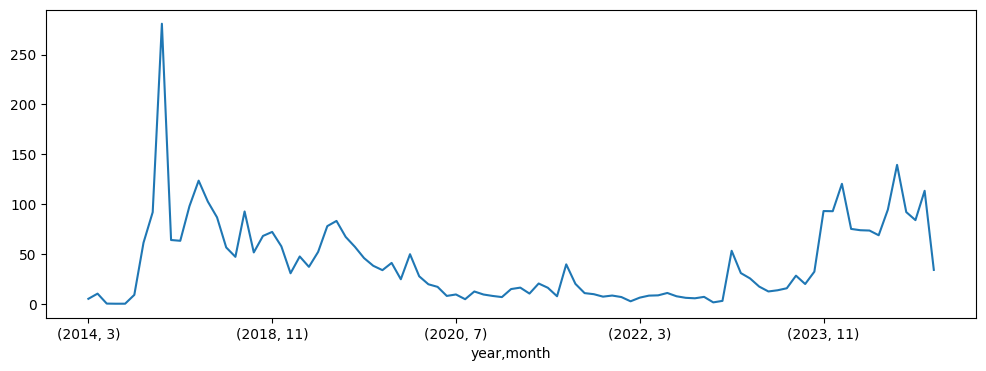

In [147]:
month_sum = (df.groupby(['year', 'month']).sum()['ms_played'] / 1000 / 60 / 60)
print(month_sum.sort_values())
month_sum.plot(figsize=(12,4))

In [148]:
y2017 = df[df['year'] == 2017]
nov2017 = y2017[y2017['month'] == 11]
nov2017.loc[:,['track_name', 'ms_played', 'artist']].groupby(['track_name', 'artist']).sum().sort_values('ms_played', ascending=False).head(25)

,,ms_played
track_name,artist,
Clarity,Adam Neely,193570673
Will He,Joji,45048062
DNA.,Kendrick Lamar,24678007
Pasar de largo,Villa Cariño,24627123
HUMBLE.,Kendrick Lamar,20399827
Pacifico,Ases Falsos,16986618
Pills,Joji,15185699
Demons,Joji,13725782
Window,Joji,11796876


In [149]:
clarity_streams = df[(df['artist'] == 'Adam Neely') & (df['track_name'] == 'Clarity')]

print(len(clarity_streams))
clarity_streams['ms_played'].sum() / len(clarity_streams) / 1000

1222


np.float64(200.3849509001637)

<Axes: xlabel='month,day,hour'>

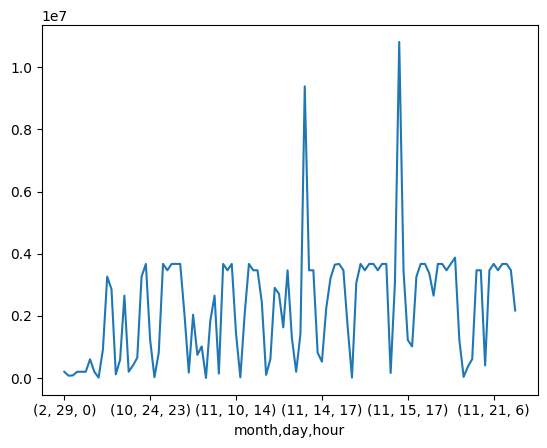

In [150]:
clarity_streams.groupby(['month', 'day', 'hour']).sum()['ms_played'].plot()

In [151]:
yves = df[df['artist'] == 'Yves']
yves.groupby('track_name')['ms_played'].sum() / 1000 / 60 / 60

track_name
Afterglow                  0.193941
DIORAMA                    1.294770
Goldfish                   0.059462
LOOP (feat. Lil Cherry)    4.120687
Tik Tok                    2.141924
Name: ms_played, dtype: float64

In [152]:
df['year'].value_counts().sort_index()

year
2014      433
2016        3
2017    10707
2018    20515
2019    12623
2020     3251
2021     3452
2022     1588
2023     9747
2024    21424
Name: count, dtype: int64

In [153]:
years = df['year'].unique()
yearly_data = [df[df['year'] == year] for year in years]
total = 0
for year in yearly_data:
    total += len(year)
    print(f'{len(year)}')
total

433
3
10707
20515
12623
3251
3452
1588
9747
21424


83743

In [154]:
def get_top_category(df, categories, count=5):
    return (df.groupby(categories).sum().sort_values('ms_played', ascending=False).head(count)[['ms_played']])  
for data in yearly_data:
    print(f'year: {data['year'].iloc[0]}')    
    print(get_top_category(data, ['artist', 'album'], 10))

year: 2014
                                                    ms_played
artist            album                                      
Tiro De Gracia    Ser Hümano!!                        9830046
JAY-Z             Collision Course                    4251647
Capital Cities    In A Tidal Wave Of Mystery          3599039
Sum 41            Screaming Bloody Murder             3588533
Tiro De Gracia    Retorno de Misericordia             2738249
                  Impacto Certero - Grandes Éxitos    1931168
Incubus           Incubus HQ Live Deluxe Edition      1902145
Pharrell Williams G I R L                             1769039
Bruno Mars        Unorthodox Jukebox                  1667655
Sum 41            Underclass Hero                     1533151
year: 2016
                                               ms_played
artist           album                                  
Cannibal Corpse  Torturing and Eviscerating        47397
Protest The Hero The Best of Protest the Hero      28467
year: 

<Axes: >

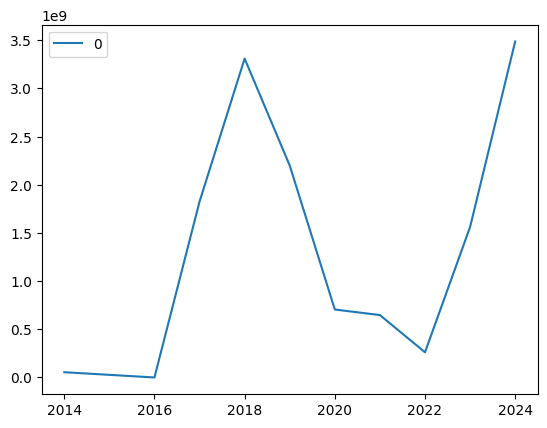

In [155]:
# count_per_year = {}
years = []
count = []
for data in yearly_data:
    # print(f'year: {data['year'].iloc[0]}, total_ms: {data['ms_played'].sum()}')
    # count_per_year[data['year'].iloc[0]] = data['ms_played'].sum()
    years += [data['year'].iloc[0]]
    count += [data['ms_played'].sum()]

count_df = pd.DataFrame(count, index=years)
count_df.plot()
